# Principal Component Analysis Tutorial

## 1. Introduction

This tutorial allows you to dive deeper into the applications of Principle Component Analysis or PCA specifically focusing on facial recognition. Facial recognition is one of the bigger applications of PCA in the industry. For instance, as you may know even iPhones use facial recognition so users can unlock their phone. Although in the computer vision field a combination of PCA, neural networks, etc. are used for facial recognition, we can achieve basic understanding of facial recognition through utilizing EigenFaces, which uses facial images to generate a set of features. In general EigenFaces is a dimension reduction technique which essentially means that we reduce the dimensions of feature space. As you will see, applying PCA to image data is a harder application of the algorithm but an important application as facial recognition is increasing in products. 



### Tutorial content

In this tutorial, we will show how to apply the PCA algorithm to image data in Python, specifically using [OpenCV](https://docs.opencv.org/master/), [numpy](https://numpy.org/doc/stable/), and [instaloader](https://instaloader.github.io/). Both OpenCV and numpy are used for PCA with EigenFaces and data preprocessing while instaloader is used for data collection. 

Rather than utilizing benchmarking data throughout this tutorial, we have also provided you with key skills to create your own image dataset, preprocess these images for PCA, and prep for modeling. Using instaloader you will be able to generate your own image dataset based on pulling instagram posts from specific instagram profiles.

We will cover the following topics in this tutorial:
- [What is PCA?](#2.-What-is-PCA?)
- [Installing the libraries](#3.-Installing-the-libraries)
- [Basic Application of PCA Algorithm: Facial Data](#4.-Basic-Application-of-PCA:-Facial-Data)
- [Application of PCA Algorithm: Supermodel Data](#5.-Application-of-PCA:-Supermodel-Data)
    - [Loading and Understanding the Data](#Loading-and-Understanding-the-Data)
    - [Data Preprocessing](#Data-Preprocessing)
    - [PCA Algorithm](#PCA-Algorithm)
        - [Explained Variance](#Explained-Variance)

## 2. What is PCA?
What if we want to reduce the number of dimensions of our dataset without losing too much information? Principal Component Analysis is a dimension-reduction technique that aims to find the directions of maximum variance in our data. For ‘p’ dimensions, we want to find the ‘q’ directions in which we can describe most of our data. These ‘q’ directions, or principal components, are significantly less than the ‘p’ dimensions we have for our data, and each of these principal components are perpendicular to each other such that they are uncorrelated. The original ‘p’ features are linearly correlated but the components that are extracted are not. Although this reduction of features does result in a decrease of accuracy, decreasing accuracy is worth it if it allows for simplicity and easier computation. For instance, datasets with fewer features are easier to visualize and allow for faster computation as machine learning algorithms would have less variables to process. In general there are five main steps for Principal Component Analysis: Standardize the continuous variables, compute the covariance matrix of the ‘p’ features,compute the eigenvectors and eigenvalues of the covariance matrix, extract the principal components, apply our principal components to our data. 

1. Standardizing variables: The first step is to standardize the range of the continuous variables so that each of the values contributes fairly to the analysis.  When we have large differences between initial variables, these variables would overpower those variables with smaller differences, potentially resulting in bias. Thus, when we standardize our variables through scaling data we can help prevent this problem. For instance, we can standardize our data by doing the following:
![One Method of Standardizing](standardizing.png)

In our basic example with LFW data below we will be using sklearn's StandardScaler(). StandardScaler normalizes each feature (each column) individually in order for each feature's mean to be equal to 0 and each feature's standard deviation equal to 1.



2. Computing the covariance matrix: Next we want to identify if variables have relationships to each other. In order to identify any strong relationships between variables, we can try to identify the correlations between these features so that we can see which variables are highly correlated. When variables are highly correlated we know that these variables are redundant as they capture the same information again, thus we utilize a covariance matrix to find these highly correlated variables. Covariannce matrixes are symmetric matrices of size p x p where p is the number of dimensions. Covariance matrices show the covariance of each pair of variables in our data. When the covariance value for a pair of variables is negative we know that the variables are inversely correlated as when one variable increases the other variable decreases. On the other hand, when the covariance value for a pair of variables is positive we know that the variables are directly correlated as when one variable increases or decreases the other variable will also increase or decrease.

3. Computing Eigenvectors and Eigenvalues: Eigenvectors and Eigenvalues are computed from the covariance matrix using linear algebra and allow us to determine the principal components. In general, eigenvectors and eigenvalues come in pairs and there are p (number of dimensions) pairs. Eigenvectors are the principal components or essentially the direction of axes where we observe the most variance and can capture the most amount of information. The resulting principal components are uncorrelated and information is captured by these principal components. The goal of PCA is to have the first component capture as much information, the second component captures the most information from the rest of the information and so on. On the other hand, eigenvalues show us the variance of each principal component. 

 4. After computing the eigenvectors and eigenvalues we are able to choose the number of principal components we want to use for our data based on sorting our eigenvectors from greatest capture of information to least capture. For our case, we want to capture at least 95% of variance for instance.

5. Finally we can apply our principal component axes to our data and our data will be ready for modeling or classification with a reduced dataset.

## 3. Installing the libraries
Before getting started, you'll need to install the various libraries that we will use. You can install opencv (cv2 depends on this) instaloader using pip:

OpenCV (for using cv2):
$ pip install opencv-python

Instaloader (for downloading instagram post images):
$ pip install instaloader

Run the following to import libraries.

In [20]:
import instaloader
import sys
import numpy as np
import cv2
import glob
import sklearn
from matplotlib import pyplot as plt
import random

## 4. Basic Application of PCA: Facial Data
To start, we will be looking at the lfw (Labeled Faces in the Wild) dataset included with sklearn datasets. This example will give you a brief overview of applying PCA to facial data in order to achieve a reduced dataset. The lfw dataset is considered a benchmarking dataset and this example is strictly shown for understanding of the process of reducing features with PCA and applying classification to this new and more manageable dataset. The LFW dataset is used for facial verification. In total the dataset contains over 13000 images (we can see below that there are 13,233 images and each image is of pixel width*piixel height=2914) of people from the web. This dataset is already pre-labeled and each of the 1680 people have two or more unique images.

In [21]:
from sklearn import datasets
lfw_faces = datasets.fetch_lfw_people()
lfw_faces.data.shape

(13233, 2914)

We can first plot a sample of our images to see what they look like. Below we can see that each image is pre-sized and thus all the images are of the same sizes. We also change the images to be in grayscale for easy viewing.

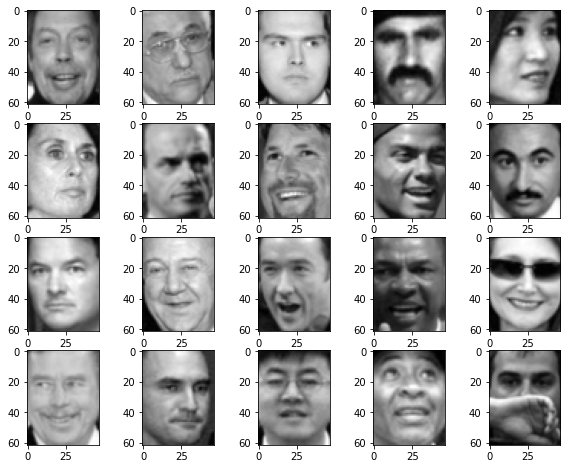

In [22]:
plt.figure(figsize=(10, 8))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(lfw_faces.images[i], cmap="gray")

Using sklearn model selection we can split our data into test data and train data and split the label data in the same way. We can see that the train data contains 9924 images and the test data includes 3309 images. 2914 represents the pixels for the width of the image multiplied by the pixels of the height of the image.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, labels_train, labels_test = train_test_split(lfw_faces.data,
        lfw_faces.target)

print(X_train.shape, X_test.shape)

(9924, 2914) (3309, 2914)


As mentioned in the explanation of PCA we want to standardize our data and will use StandardScaler. This will normalize each feature (each column in our training data) individually in order for each feature's mean to be equal to 0 and each feature's standard deviation equal to 1.

In [24]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X_train)

Next we will compute the covariance matrix of the standardized training data using numpy's covariance function. For covariance matrices the diagonal from the top left to bottom right of the covariance matrix represent the variances of each variable and the matrix is symmetrical regarding this axis.

In [25]:
covariance_matrix=np.cov(X_std.T)
covariance_matrix

array([[ 1.00010078,  0.9672191 ,  0.88540023, ..., -0.0083964 ,
        -0.01211914, -0.01718544],
       [ 0.9672191 ,  1.00010077,  0.96005227, ..., -0.00828387,
        -0.01412105, -0.02125657],
       [ 0.88540023,  0.96005227,  1.00010078, ..., -0.00446223,
        -0.01291696, -0.02293046],
       ...,
       [-0.0083964 , -0.00828387, -0.00446223, ...,  1.00010078,
         0.94425633,  0.83785036],
       [-0.01211914, -0.01412105, -0.01291696, ...,  0.94425633,
         1.00010078,  0.95360803],
       [-0.01718544, -0.02125657, -0.02293046, ...,  0.83785036,
         0.95360803,  1.00010078]])

Next using numpy's linear algebra eigen solver we comput our eigenvalues and eigenvectors. As mentioned above Eigenvectors are the principal components and they represent the direction of axes where we observe the most variance and can capture the most amount of information and eigenvalues show us the variance of each principal component.

In [26]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

As we can see we have the same number of eigenvalues and eigenvectors and 2914 represents the number of principal components we have in total.

In [28]:
(len(eigenvalues), len(eigenvectors))

(2914, 2914)

Now we want to understand how many principal components we want to use to reduce our dataset. One metric that is useful in identifying the number of principal components needed is Explained Variance Ratio. The way explained variance ratio is calculated is by dividing the explained variance for each component by the total explained variance of all components. The following code demonstrates how to calculate explained variance ratios and visualizes the explained variance rato for p number of principal components. Since we have a total of 2914 principal components (essentially the number of pixels) I have decided to plot number of components by explained variance ratio for 100 components to 1800 components to determine the ideal number of principal components to use.

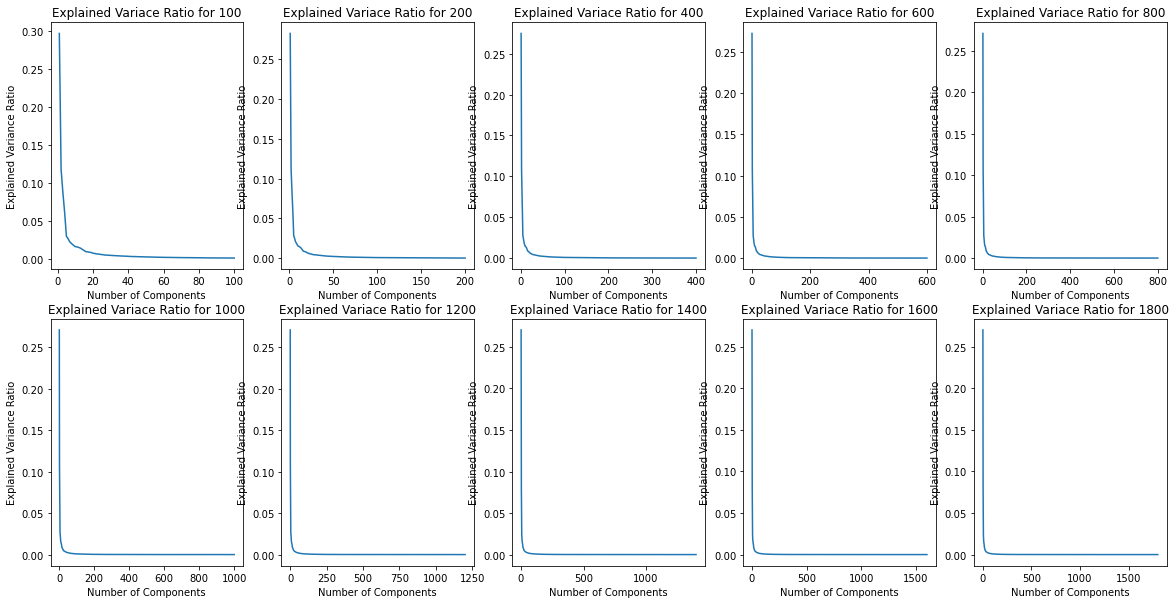

In [9]:
components_options = [100,200,400,600,800,1000,1200,1400,1600,1800]
components_list=[]
explained_variance_ratio_list=[]
for element in components_options:
    components=range(1, element+1)
    components_list.append(components)
    n_eigen_values = eigenvalues[0:element]
    n_eigen_vectors = eigenvectors[0:element, :]
    explained_variance_ratio=[]
    total=0
    for i in range(element):
        total+=n_eigen_values[i]
    for i in range(element):
        explained_variance_ratio.append((n_eigen_values[i])/total)
    explained_variance_ratio_list.append(explained_variance_ratio)
plt.figure(figsize=(20, 10))
for i in range(len(components_options)):
    plt.subplot(2, 5, i+1)
    plt.plot(components_list[i],explained_variance_ratio_list[i])
    plt.xlabel("Number of Components")
    plt.ylabel("Explained Variance Ratio")
    plt.title("Explained Variace Ratio for "+str(components_options[i]))
plt.show()


From the abpve plots we can see the curves from 400 principal components to 1800 principal components do not dramatically change. In fact we can see that even with 200 principal components the curve looks extremely similar to the other plots suggested that even with 200 prncipal components we are capturing most of the information required based on looking at the explained variance ratios for each component. Now let's make a more formal argument on what the number of principal components needed to capture most of the information of the data. Below we have defined that we want to capture 95% of variance in the dataset (in industry this number can range from 85% to even 99% depending on your organization's definition of what capturing the necessary information looks like).

In [30]:
variance_percent=0.95
total_variation=0
for i in range(len(eigenvalues)):
        total_variation+=eigenvalues[i]
needed_variance = variance_percent * total_variation

needed_components = 0
compare_variance = 0
for i in range(len(eigenvalues)):
    compare_variance += eigenvalues[i]
    if needed_variance<=compare_variance:
        needed_components = i + 1
        break

print("Number of Components needed for 95% variance capture: "+str(needed_components))

Number of Components needed for 95% variance capture: 179


The above code showcases how to compute the number of principal components needed to capture 95% of variance. We first calculate 95% of the data's total variation, We then compare the individual varances to 95% of the data's total variation to determine the number of components needed. As we can see above we only need 179 principal components to capture 95% of the data's total variation. This makes sense as previously with our explained variance ratio plots we found that even when using around 200 principal components we are able to capture most of the data's information.
Now we perform PCA using sklearn decomposition using 179 components. We use whiten=True as PCA whitening is a common method used for image data to makes data less redundant as adjacent features can be correlated and whitening reduces correlation.

In [31]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=179, whiten=True)
pca.fit(X_std)

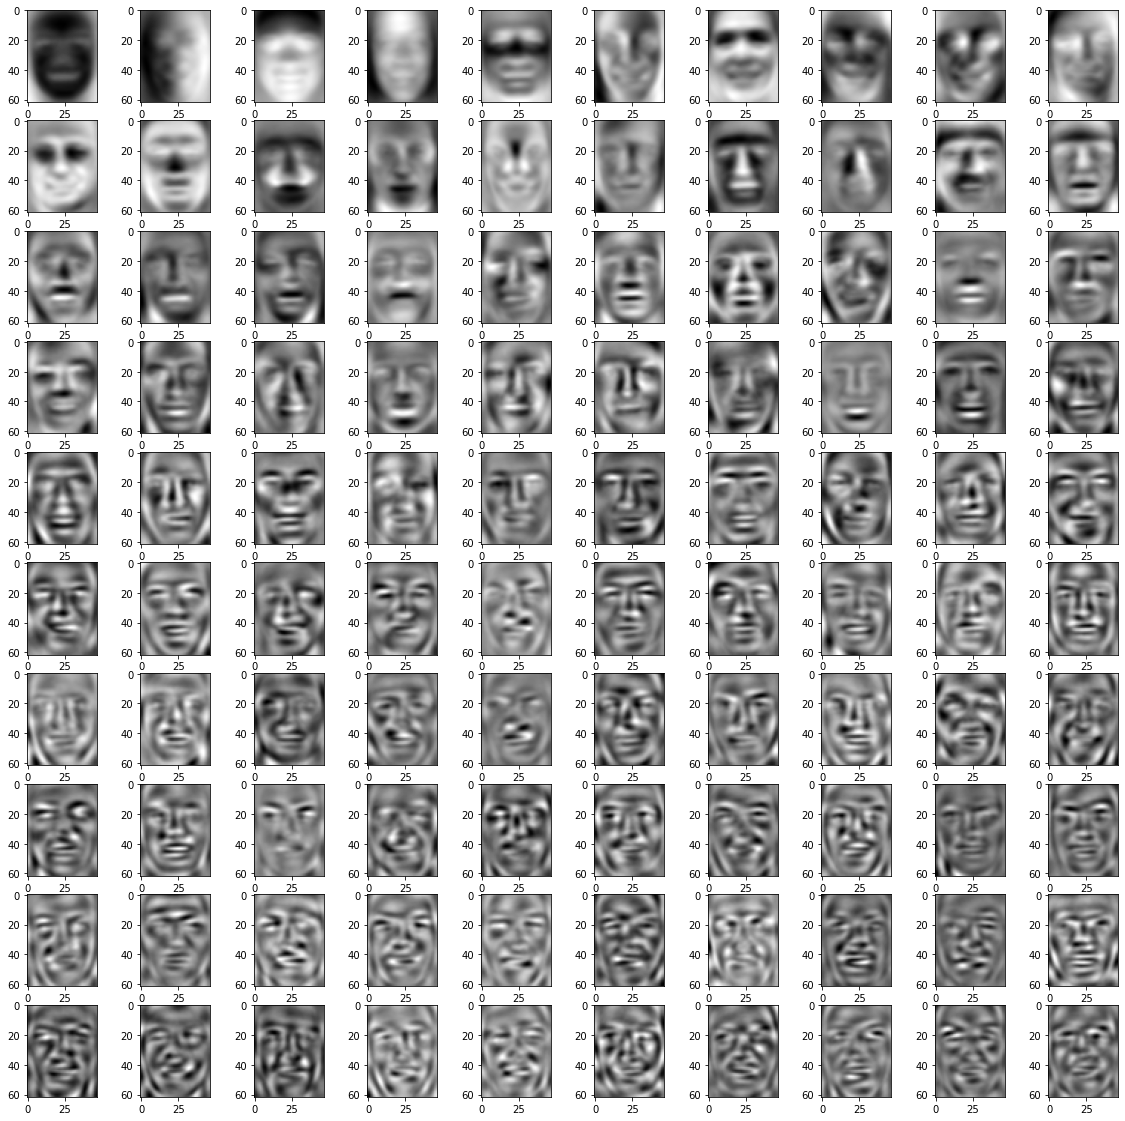

In [32]:
plt.figure(figsize=(20, 20))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(pca.components_[i].reshape(lfw_faces.images[0].shape),
              cmap="gray")

In [35]:
train_pca = pca.transform(X_train)
test_pca = pca.transform(X_test)

# 5. Application of PCA: Supermodel Data

### Loading and Understanding the Data
Let us say that we wanted to create a image data set for facial recognition by pulling from the Instagram API. Instaloader allows us you to do just that by pulling media content from various Instagram profiles or hashtags etc. In our case, we want to generate an image dataset of top super models across the world. The reason for choosing super models as our subjects for our image dataset is due to my assumption that supermodels tend to post more selfies or close up images of themselves which makes their instagram posts' ideal for our facial reconition image dataset. 

To begin with, we have found that Adriana Lima, Bella Hadid, Emily Ratajkowski, Gigi Hadid, Kendall Jenner, Liu Wen, and Rosie Hungtington are supermodels that were ranked the top ten highest paid supermodels in 2020. The goal is to generate an images directory with 200 images per model.

In [45]:
PROFILES = ["adrianalima","bellahadid","emrata","gigihadid","karliekloss","kendalljenner","liuwenlw","rosie.huntington"]
# profiles to download from

### Data Preprocessing

#### Instructions to Load the Data
Create a folder called "images" in the directory of this file. Run the following code chunk and move the individual super model images folders to the "images" folder. The following code utilizes Instaloader which is a library that can pull and download Instagram posts using the Instagram API. Considering we want to generate a dataset of 200 images per model we only download picture posts and set the max_count of downloads to be 200 images.

In [46]:
from instaloader import Instaloader, Profile

def load_instagram_posts():
    for i in range(len(PROFILES)):
        L = Instaloader(download_videos=False,save_metadata=False, compress_json=False, rate_controller=None)
        L.post_metadata_txt_pattern = ""
        L.download_geotags = False
        L.save_metadata_json = False
        L.download_comments = False

        profile = Profile.from_username(L.context, PROFILES[i])
        posts = profile.get_posts()

        L.posts_download_loop(posts, PROFILES[i], fast_update=False, post_filter=None, max_count=200, total_count=200, owner_profile=profile)
    return


#### Formatting Images
We now have 200 images of each supermodel in seperate folders. We can see below that the first image for every model is black when reading the image with cv2 so we must exclude this image for each model when we generate an images list consisting of images from all models.

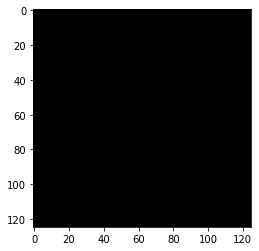

In [42]:

images=[cv2.imread(file) for file in glob.glob("images/adrianalima/*.jpg")]
image=cv2.resize(images[0], (125,125), interpolation = cv2.INTER_AREA)
plt.imshow(image, cmap = 'gray')
plt.show()


Despite us setting the max_count to be 200 posts using instaloader, some Instagram posts have multiple pictures so we see below that the length of images in a model folder can be greater than 200 images.

In [ ]:
len(images)

Let's now generate an images list and a labels list that consists of 200 images from each model (excluding the black images that occur as the first image for every model. By the end the images list should have 1600 images where the first 200 images are of Adriana Lima, the second 200 images are of Bella Hadid, etc. The labels list will label the images by the instagram handle of the model. 

In [47]:
    images=[]
    labels=[]
    for i in range (len(PROFILES)):
        temp=[cv2.imread(file) for file in glob.glob("images/"+PROFILES[i]+"/*.jpg")]
        temp=temp[1:201] #we start with 1 because 0th index contains the black image
        labels_temp=[PROFILES[i]]*200
        labels = labels + labels_temp
        images = images+temp


Using an arbitrary index I have shown one image from each supermodel's instagram posts. As you can see the images are varying in size so we need to resize each image. Note: we use cv2.COLOR_BGR2RGB to display the images because cv2 reads an image in BGR not RGB so displaying the images with BGR looks different than the original picture.

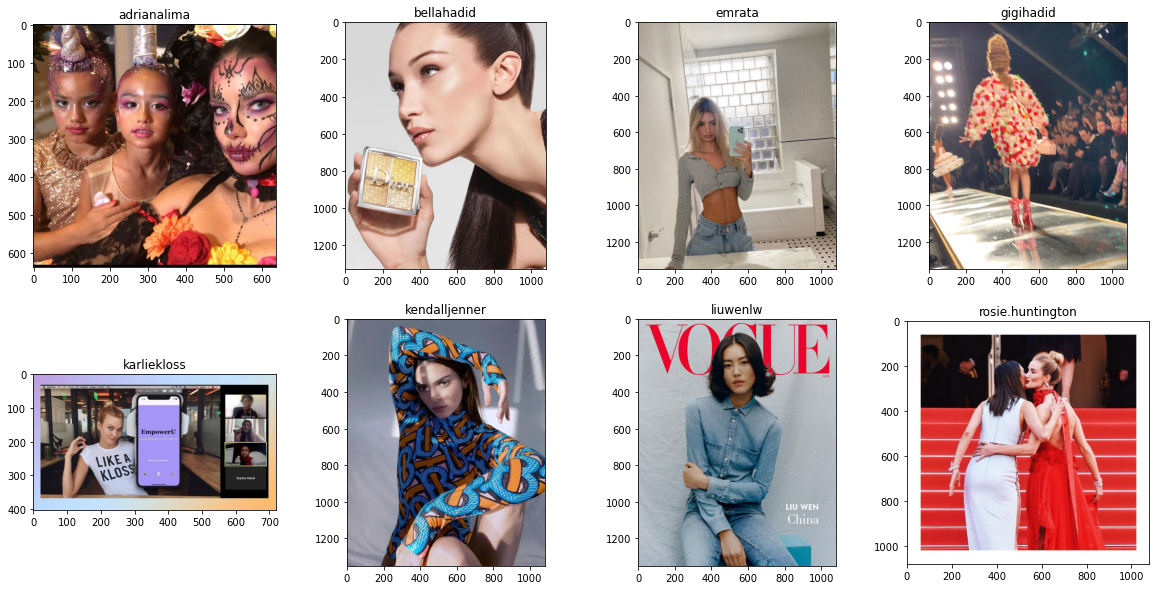

In [6]:

plt.figure(figsize=(20, 10))
index = [50,250,450,650,850,1050,1250,1450]
image_plotting = [images[index[0]],images[index[1]],images[index[2]],images[index[3]],images[index[4]],images[index[5]],images[index[6]],images[index[7]]]
labels_plotting = [labels[index[0]],labels[index[1]],labels[index[2]],labels[index[3]],labels[index[4]],labels[index[5]],labels[index[6]],labels[index[7]]]
for i in range(len(index)):
    plt.subplot(2, 4, i+1)
    plt.imshow(cv2.cvtColor(image_plotting[i], cv2.COLOR_BGR2RGB))
    plt.title(labels_plotting[i])

Now let's format our images to ensure that they are the same size and are in grayscale. Below is our original image. 

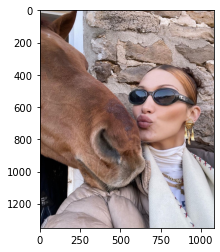

In [7]:
image = cv2.cvtColor(images[201], cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()


Now we format our image by resizing the image to 125 pixels by 125 pixels and changing the image to grayscale. The image below is our properly formatteed image.

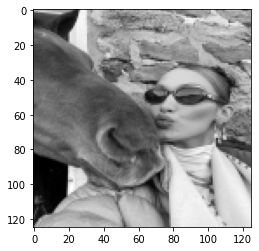

In [8]:
resized_image=cv2.resize(images[201], (125,125), interpolation = cv2.INTER_AREA)
grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_RGB2GRAY)
plt.imshow(grayscale_image, cmap = 'gray')
plt.show()

#### Splitting Image Data into Training and Test Data
We now want split the original images list into training and test data. First we randomize the data but ensure to randomize the labels in the same way so that a picture of a model with index i in the images list has the corresponding model's name in the labels list at index i. We have decided to use 1120 images for the training set and the remaining for the test set. We also create labels training list and labels test list.

In [48]:
    randomize = list(zip(images, labels))
    random.shuffle(randomize)
    images, labels = zip(*randomize)

    num_rows = len(images)
    idx = 1120 
    

    images_train= images[0:idx]
    images_test = images[idx:-1]
    
    labels_train=labels[0:idx]
    labels_test = labels[idx:-1]

Now we format our training and test image sets by resizing each image and changing the image to grayscale like we did previously. We then format the list as a numpy array and ensure its resultinng shape is (number of images, total pixels).

In [49]:
train_length=len(images_train)
test_length=len(images_test)
total_pixels=125*125

formatted_train=[]
formatted_test=[]
for i in range(len(images_train)):
    resized_image_train=cv2.resize(images_train[i], (125,125), interpolation = cv2.INTER_AREA)
    grayscale_image_train = cv2.cvtColor(resized_image_train, cv2.COLOR_RGB2GRAY)
    formatted_train.append(grayscale_image_train)
for i in range(len(images_test)):
    resized_image_test=cv2.resize(images_test[i], (125,125), interpolation = cv2.INTER_AREA)
    grayscale_image_test = cv2.cvtColor(resized_image_test, cv2.COLOR_RGB2GRAY)
    formatted_test.append(grayscale_image_test)
pictures=formatted_train
formatted_train=np.asarray(formatted_train).reshape(total_pixels,train_length)
formatted_test=np.asarray(formatted_test).reshape(total_pixels,test_length)
formatted_train = np.asarray(formatted_train).transpose()
formatted_test = np.asarray(formatted_test).transpose()
      



We can see for example that there are 1120 images and 15625 pixels in each image in the train np array.

In [50]:
formatted_train.shape

(1120, 15625)

### PCA Algorithm
As mentioned in our description of PCA we start with standardizing our data using StandardScaler.

In [51]:
from sklearn.preprocessing import StandardScaler
train_std = StandardScaler().fit_transform(formatted_train)

Next we create a covariance matrix from the standardized training data using numpy's covariance function.

In [52]:
covariance_matrix = np.cov(train_std.T)

We compute the eigenvalues and eigenvectors from the above covariance matrix. WARNING: This may take 20 minutes to run given the large amount of data.

In [14]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

As mentioned previously eigenvalues and eigenvectors come in pairs and we have 15625 pairs which means we have 15625 features. As already seen above by how long it takes to even compute the eigenvalues and eigenvectors large amounts of features slow computation and if we applied a classification algorithm for example running the algorithm would take a lot of time give the large amount of features, which is why we need to use PCA to reduce the dimensions in the dataset.

In [15]:
len(eigenvectors)

15625

/Users/nehachintamaneni/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


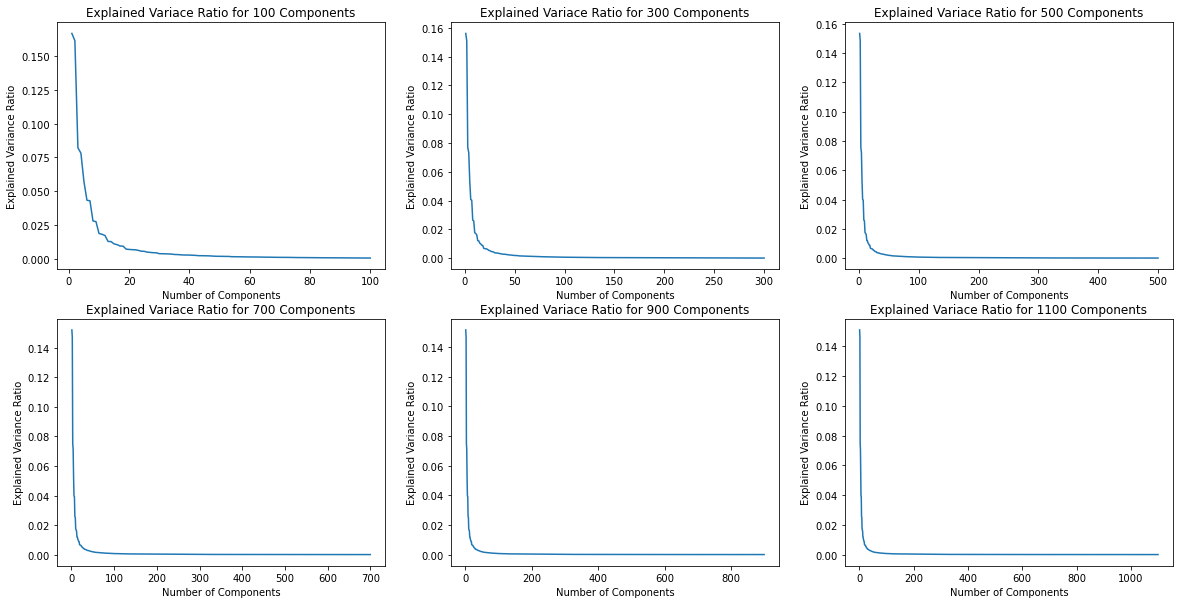

In [16]:
components_options = [100,300,500,700,900,1100]
components_list=[]
explained_variance_ratio_list=[]
for element in components_options:
    components=range(1, element+1)
    components_list.append(components)
    n_eigen_values = eigenvalues[0:element]
    n_eigen_vectors = eigenvectors[0:element, :]
    explained_variance_ratio=[]
    total=0
    for i in range(element):
        total+=n_eigen_values[i]
    for i in range(element):
        explained_variance_ratio.append((n_eigen_values[i])/total)
    explained_variance_ratio_list.append(explained_variance_ratio)
plt.figure(figsize=(20, 10))
for i in range(len(components_options)):
    plt.subplot(2, 3, i+1)
    plt.plot(components_list[i],explained_variance_ratio_list[i])
    plt.xlabel("Number of Components")
    plt.ylabel("Explained Variance Ratio")
    plt.title("Explained Variace Ratio for "+str(components_options[i])+" Components")
plt.show()


In [32]:
variance_percent=0.95
total_variation=0
for i in range(len(eigenvalues)):
        total_variation+=eigenvalues[i]
needed_variance = variance_percent * total_variation

needed_components = 0
compare_variance = 0
for i in range(len(eigenvalues)):
    compare_variance += eigenvalues[i]
    if needed_variance<=compare_variance:
        needed_components = i + 1
        break

print("Number of Components needed for 95% variance capture: "+str(needed_components))

Number of Components needed for 95% variance capture: 203


In [33]:
needed_components_matrix = np.empty(shape=(formatted_train.shape[1], needed_components))
for i in range(needed_components):
    needed_components_matrix[:, i] = eigenvectors[i]
needed_components_matrix.shape

<ipython-input-33-8ac22b195415>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  needed_components_matrix[:, i] = eigenvectors[i]


(15625, 203)

In [34]:
components_matrix=needed_components_matrix.reshape(125,125,needed_components)

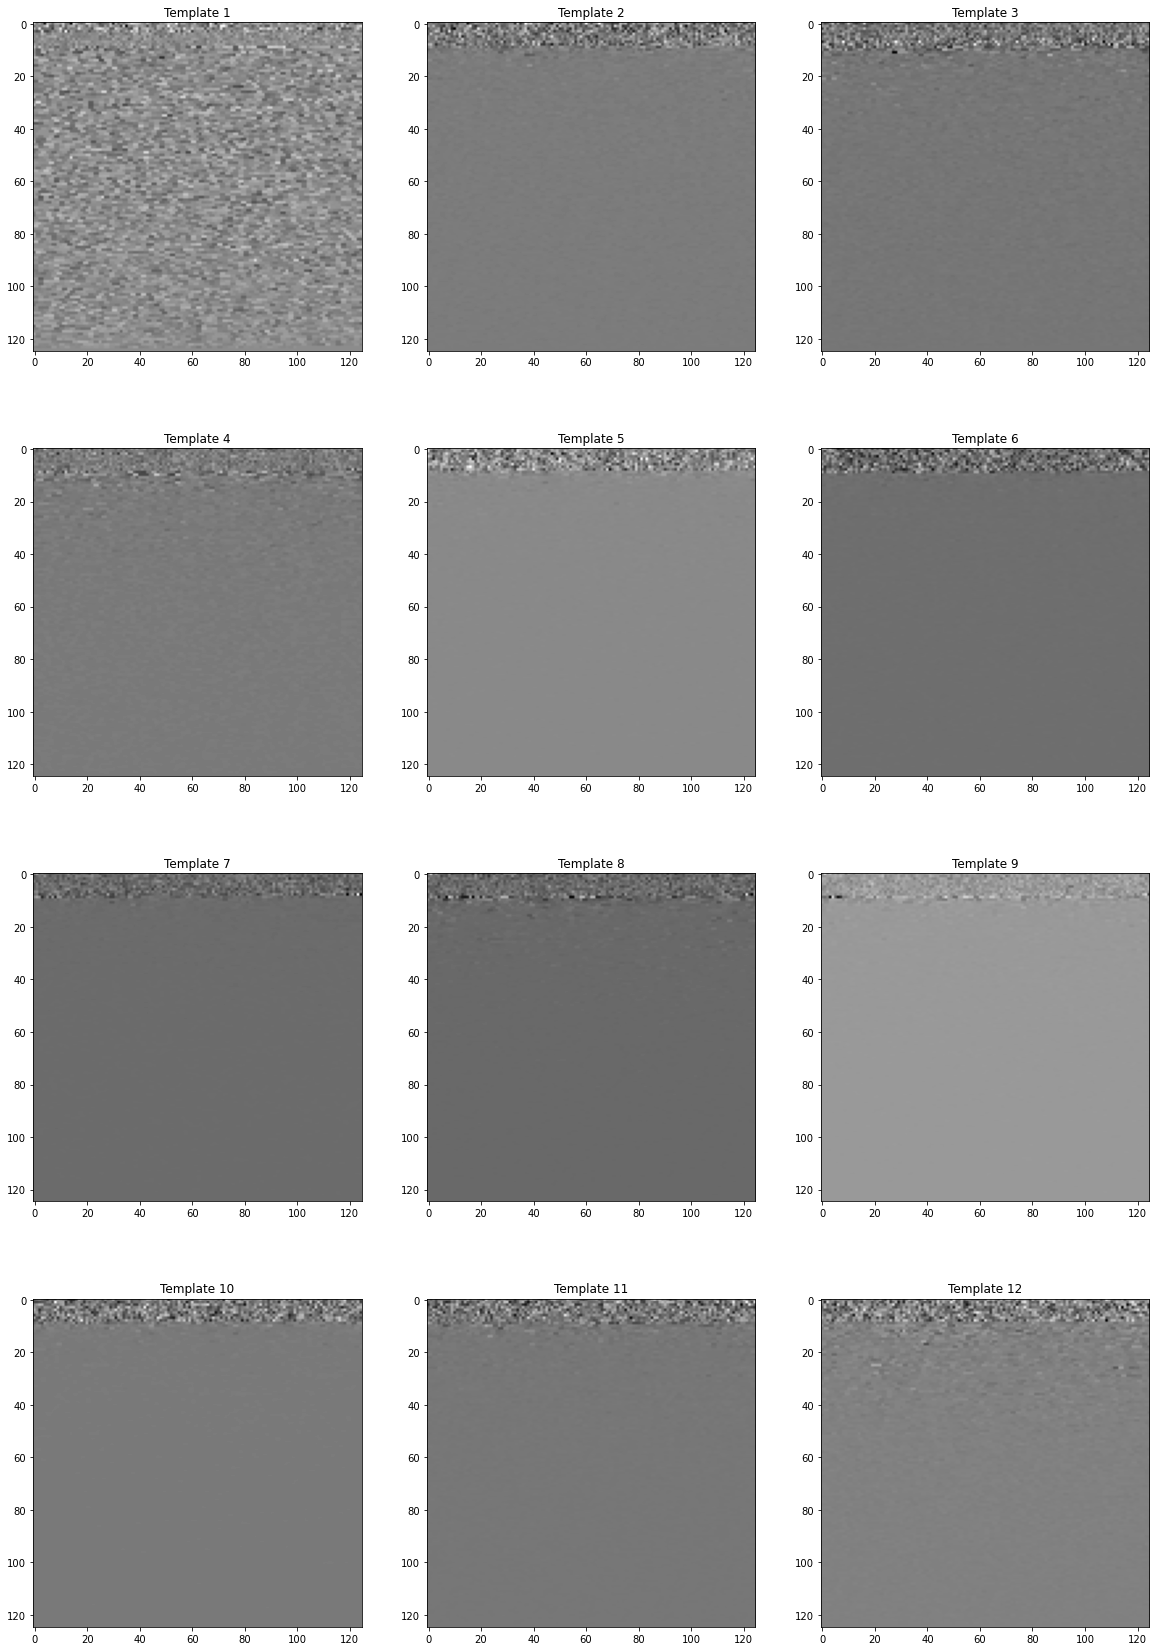

In [44]:
plt.figure(figsize=(20, 30))

for i in range(0,12):
    plt.subplot(4, 3, i+1)
    plt.imshow(components_matrix[:,:,i], 'gray')
    plt.title('Template {}'.format(i+1))

In [35]:
projected_data = formatted_train.dot(needed_components_matrix) 

In [36]:
print(projected_data.shape)

(1120, 203)


Label karliekloss


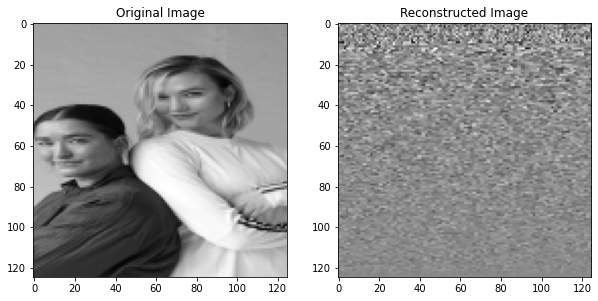

In [46]:
import random

# index of the image to reconstruct
index = 5

projected_image= np.expand_dims(projected_data[index], 0)  # (1, num_dims)

# Matrix multiply projected_image(1, num_dims) with projection_matrix transposed(num_dims, 784)
reconstructed_image = projected_image.dot(needed_components_matrix.T)  # (1, 784)
reconstructed_image = reconstructed_image.reshape(125,125)

print('Label {}'.format(labels_train[index]))
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(pictures[index], 'gray')

plt.subplot(1, 2, 2)
plt.title('Reconstructed Image')
plt.imshow(reconstructed_image, 'gray')